In [37]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


df=pd.read_csv("DD.csv",sep=",")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

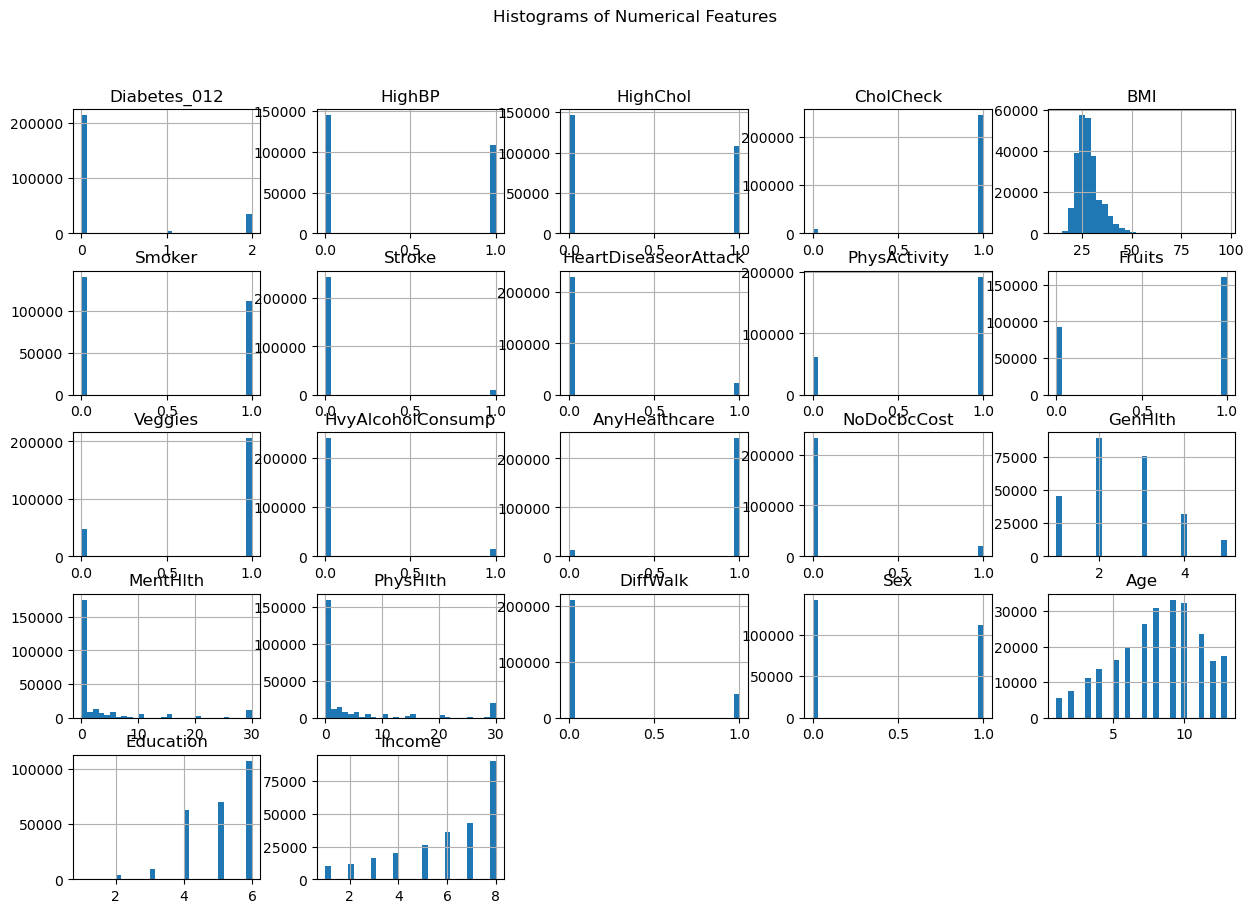

In [39]:
# Histograms for numerical features
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

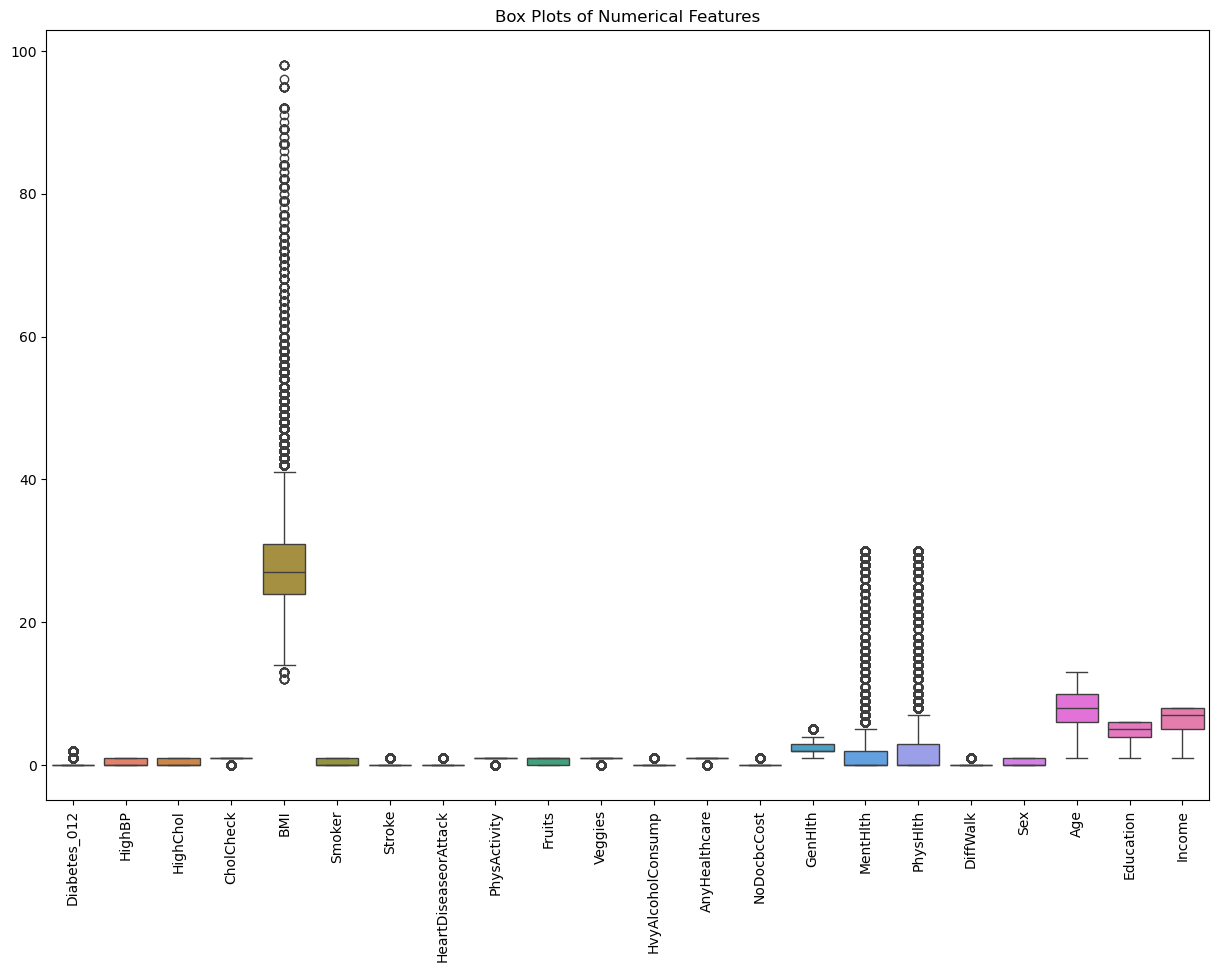

In [40]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=90)
plt.show()

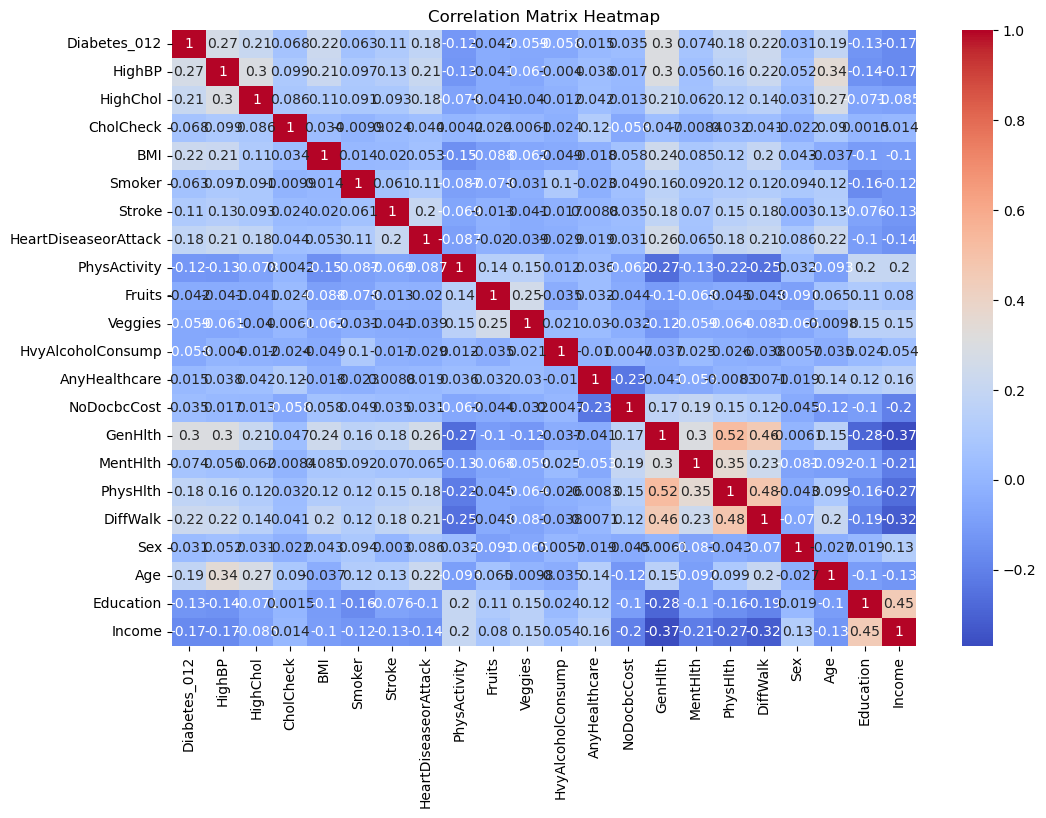

In [41]:
# Heatmap of the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

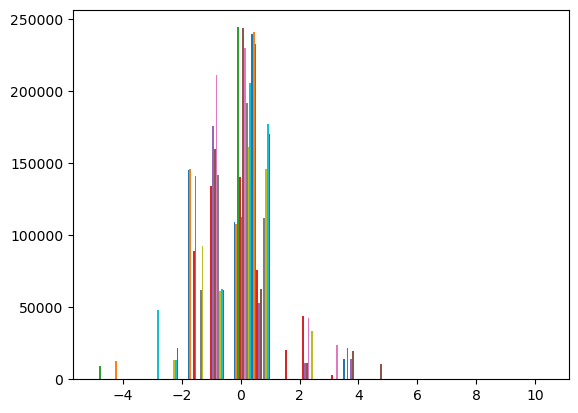

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df=scaler.fit_transform(df)
plt.hist(df)
plt.show()

In [44]:
from imblearn.over_sampling import SMOTE 
smote=SMOTE()
df,y=smote.fit_resample(df,y)
 
# df=selector.fit_transform(df,y)
from sklearn.model_selection import train_test_split
x,xvv,yy,yvv=train_test_split(df,y,test_size=0.2,stratify=y,shuffle=True,random_state=0)
x.shape,yy.shape,xvv.shape,yvv.shape

((512887, 21), (512887,), (128222, 21), (128222,))

In [51]:
from  sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
model=RandomForestClassifier()
model.fit(x,yy)

RandomForestClassifier()

In [52]:
model.score(xvv,yvv)

0.9314782174665814

In [53]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,xvv,yvv)
yp=model.predict(xvv)
score

array([0.86133749, 0.85658023, 0.86066916, 0.85786149, 0.86285291])

In [54]:
from sklearn.metrics import f1_score,accuracy_score
accuracy_score(yvv,yp)

0.9314782174665814

In [55]:
f1_score(yvv,yp,average="weighted")

0.9314915691875124

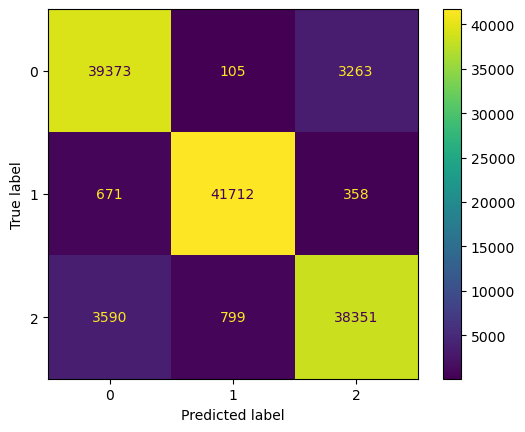

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(yvv,yp)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1,2])
cm_display.plot()
plt.show()